# Linear Discriminant Analysis

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn import model_selection
import scipy.stats as st
import seaborn as sns

LDA can be used to classify observations into more than 2 classes. The objective here is to apply LDA to the iris dataset.

In [250]:
data = load_iris(as_frame= True)['data']
clas = load_iris(as_frame= True)['target']

Test-Train Split:

In [251]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.iloc[:,:2],clas,test_size=0.2,random_state=100)

In LDA, we are trying to classify each of the observation to the most likely class by figuring out the conditional probability that an observation belongs to a class. Mathematically it can be represented as: $Pr(Y=k|X=x)$. From bayes theorem, it is known that $Pr(Y=k|X=x) =  \frac {\pi_kf(X=x|Y=k)}{\sum^k_{j=1}\pi_jf(X=x|Y=j)}$, <br>
where $\pi_k$ is the prior probability that an observation belongs to the k-class, $f(X=x|Y=k)$ is the conditional probability density of an observation given it belongs to the k-class.

In LDA we assume that the conditional density is a multivariate normal distribution with a common covariance matrix for all classes. All the parameters required to compute the posterior probability is calculated from the training data set. For simplicity, only two features are considered here. So the conditional pdf becomes a bivariate normal pdf $\frac {1}{2\pi\sigma_x\sigma_y(1-\rho^2)}e^{-\frac{1}{2(1-\rho^2)}((\frac{x-\mu_{x}}{\sigma_x^2})^2+(\frac{y-\mu_{y}}{\sigma_y^2})^2-\rho(2(\frac{x-\mu_x}{\sigma_x})(\frac{y-\mu_y}{\sigma_y}))}.$

In [252]:
def parameters(x,y):
    k=3 #three classes in data
    mu_x1 = []
    mu_x2 = []
    pi =[]
    for i in range(k):
        mu_x1.append(np.mean(x.iloc[:,0][y==i]))
        mu_x2.append(np.mean(x.iloc[:,1][y==i]))
        pi.append(np.mean(y==i))
    #s1 = np.std(x.iloc[:,0])
    #s2 = np.std(x.iloc[:,1])
    cov= np.cov(x,rowvar=False)
    return mu_x1,mu_x2,pi,cov
    

In [253]:
mu_x1,mu_x2,pi,cov = parameters(X_train,y_train)

In [254]:
mu_k = list(zip(mu_x1,mu_x2))

In [255]:
mu_k

[(4.97948717948718, 3.4153846153846157),
 (5.8999999999999995, 2.7750000000000004),
 (6.510810810810812, 2.9918918918918918)]

In [297]:
def posterior_prob(x,pi,mu_k,cov):
    posterior_prob = pd.DataFrame()
    for i in range(len(pi)):
        posterior_prob['Prob_class'+str(i+1)] = x.apply(lambda r:st.multivariate_normal.pdf(r,mean=mu_k[i],cov=cov),axis=1)*pi[i]
    sum_val = np.sum(posterior_prob,axis=1)
    for i in range(len(pi)):
        posterior_prob['Prob_class'+str(i+1)] = posterior_prob['Prob_class'+str(i+1)]/sum_val
    return posterior_prob   

In [257]:
prob =posterior_prob(X_train,pi,mu_k,cov)

In [258]:
prob

,Prob_class1,Prob_class2,Prob_class3
81,0.064582,0.758716,0.176702
99,0.140514,0.587527,0.271959
119,0.017192,0.757667,0.225141
12,0.552107,0.359670,0.088224
16,0.846147,0.065964,0.087889
...,...,...,...
87,0.014271,0.679532,0.306197
103,0.070817,0.478614,0.450569
67,0.094246,0.624021,0.281733
24,0.801081,0.141997,0.056922


The observations can be classified based on their posterior probabilities. A simple way is to choose the class with the highest posterior probability.

In [259]:
predict_clas_train = prob.apply(lambda x: np.argmax(x),axis=1)

In [260]:
m =pd.DataFrame({'Predicted_Class':predict_clas_train,'Actual Class':y_train})

In [261]:
pd.crosstab(index=m['Predicted_Class'],columns=m['Actual Class'])

Actual Class,0,1,2
Predicted_Class,,,
0,38,0,0
1,1,33,16
2,0,11,21


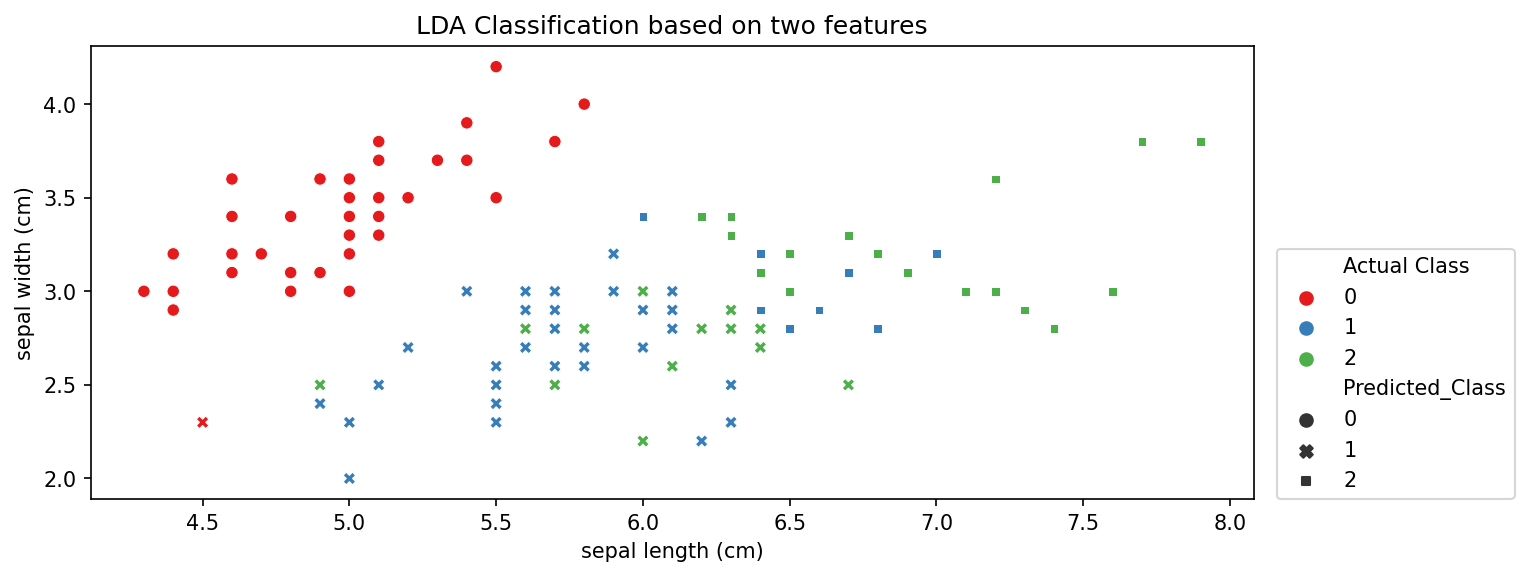

In [262]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x = X_train.iloc[:,0],y =X_train.iloc[:,1],
                hue =m['Actual Class'],style=m['Predicted_Class'],
                palette='Set1')

plt.title('LDA Classification based on two features')
plt.legend(loc=(1.02,0))

From the above graph and table, we can see that the using the two features, class 0 can be predicted. For the other two classes, the accuracy may improve when we use more features.

Using all the features:

In [263]:
def parameters(x,y):
    k=3 #three classes in data
    mu_x1 = []
    mu_x2 = []
    mu_x3 = []
    mu_x4 = []
    pi =[]
    for i in range(k):
        mu_x1.append(np.mean(x.iloc[:,0][y==i]))
        mu_x2.append(np.mean(x.iloc[:,1][y==i]))
        mu_x3.append(np.mean(x.iloc[:,2][y==i]))
        mu_x4.append(np.mean(x.iloc[:,3][y==i]))
        pi.append(np.mean(y==i))
    #s1 = np.std(x.iloc[:,0])
    #s2 = np.std(x.iloc[:,1])
    cov= np.cov(x,rowvar=False)
    return mu_x1,mu_x2,mu_x3,mu_x4,pi,cov

In [264]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data,clas,test_size=0.2,random_state=100)
mu_x1,mu_x2,mu_x3,mu_x4,pi,cov = parameters(X_train,y_train)
mu_k = list(zip(mu_x1,mu_x2,mu_x3,mu_x4))

In [265]:
prob =posterior_prob(X_train,pi,mu_k,cov)

In [266]:
prob

,Prob_class1,Prob_class2,Prob_class3
81,0.076718,0.843005,0.080277
99,0.117819,0.627964,0.254217
119,0.019113,0.869434,0.111453
12,0.635764,0.335929,0.028308
16,0.905874,0.045593,0.048533
...,...,...,...
87,0.037378,0.873672,0.088950
103,0.035680,0.504638,0.459682
67,0.090260,0.800121,0.109619
24,0.708437,0.240502,0.051060


In [267]:
predict_clas_train = prob.apply(lambda x: np.argmax(x),axis=1)
m =pd.DataFrame({'Predicted_Class':predict_clas_train,'Actual Class':y_train})
pd.crosstab(index=m['Predicted_Class'],columns=m['Actual Class'])

Actual Class,0,1,2
Predicted_Class,,,
0,38,0,0
1,1,39,10
2,0,5,27


As we can see, the use of all four features has increased the accuracy in predicting the observations in classes 1 and 2. Using the test data we measure the accuracy of the LDA model.

In [268]:
prob_test =posterior_prob(X_test,pi,mu_k,cov)
predict_clas_test = prob_test.apply(lambda x: np.argmax(x),axis=1)
m =pd.DataFrame({'Predicted_Class':predict_clas_test,'Actual Class':y_test})
pd.crosstab(index=m['Predicted_Class'],columns=m['Actual Class'])

Actual Class,0,1,2
Predicted_Class,,,
0,11,0,0
1,0,6,4
2,0,0,9


In [269]:
error_rate = sum(m['Predicted_Class']-m['Actual Class']!=0)/len(m)
print(f'The error rate of LDA for the iris dataset is estimated to be {error_rate}')

The error rate of LDA for the iris dataset is estimated to be 0.13333333333333333


# Quadratic Discriminant Analysis

The QDA is similar to LDA in that it assumes a multivariate normal pdf as the conditional pdf but it doesnot assume a constant covariance matrix for all classes. All other ideas are the same as LDA.

In [272]:
def parameters_QDA(x,y):
    k=len(np.unique(y)) #three classes in data
    mu_x1 = []
    mu_x2 = []
    mu_x3 = []
    mu_x4 = []
    cov =[]
    pi =[]
    for i in range(k):
        mu_x1.append(np.mean(x.iloc[:,0][y==i]))
        mu_x2.append(np.mean(x.iloc[:,1][y==i]))
        mu_x3.append(np.mean(x.iloc[:,2][y==i]))
        mu_x4.append(np.mean(x.iloc[:,3][y==i]))
        pi.append(np.mean(y==i))
        cov.append(np.cov(x[y==i],rowvar=False))
    return mu_x1,mu_x2,mu_x3,mu_x4,pi,cov

In [276]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data,clas,test_size=0.2,random_state=100)
mu_x1,mu_x2,mu_x3,mu_x4,pi,cov = parameters_QDA(X_train,y_train)
mu_k = list(zip(mu_x1,mu_x2,mu_x3,mu_x4))

In [304]:
def posterior_prob_QDA(x,pi,mu_k,cov):
    posterior_prob = pd.DataFrame()
    for i in range(len(pi)):
        posterior_prob['Prob_class'+str(i+1)] = x.apply(lambda r:st.multivariate_normal.pdf(r,mean=mu_k[i],cov=cov[i]),axis=1)*pi[i]
    sum_val = np.sum(posterior_prob,axis=1)
    for i in range(len(pi)):
        posterior_prob['Prob_class'+str(i+1)] = posterior_prob['Prob_class'+str(i+1)]/sum_val
    return posterior_prob

In [305]:
prob_QDA =posterior_prob_QDA(X_train,pi,mu_k,cov)

In [308]:
prob_QDA

,Prob_class1,Prob_class2,Prob_class3
81,8.672338e-42,9.999942e-01,5.756495e-06
99,1.433535e-56,9.999177e-01,8.225814e-05
119,1.595652e-100,4.949748e-02,9.505025e-01
12,1.000000e+00,4.752028e-19,9.174629e-40
16,1.000000e+00,9.191543e-28,1.920502e-54
...,...,...,...
87,2.986919e-75,9.983274e-01,1.672638e-03
103,8.439961e-129,8.633247e-03,9.913668e-01
67,1.035010e-50,9.998769e-01,1.231398e-04
24,1.000000e+00,7.882395e-19,5.265299e-36


In [310]:
predict_clas_train = prob_QDA.apply(lambda x: np.argmax(x),axis=1)
m =pd.DataFrame({'Predicted_Class':predict_clas_train,'Actual Class':y_train})
pd.crosstab(index=m['Predicted_Class'],columns=m['Actual Class'])

Actual Class,0,1,2
Predicted_Class,,,
0,39,0,0
1,0,43,1
2,0,1,36


The accuracy of the QDA seems to be higher than the LDA for the dataset. Calculating the test error rate:

In [311]:
prob_test_QDA =posterior_prob_QDA(X_test,pi,mu_k,cov)
predict_clas_test = prob_test_QDA.apply(lambda x: np.argmax(x),axis=1)
m =pd.DataFrame({'Predicted_Class':predict_clas_test,'Actual Class':y_test})
pd.crosstab(index=m['Predicted_Class'],columns=m['Actual Class'])

Actual Class,0,1,2
Predicted_Class,,,
0,11,0,0
1,0,6,0
2,0,0,13


In [312]:
error_rate = sum(m['Predicted_Class']-m['Actual Class']!=0)/len(m)
print(f'The error rate of LDA for the iris dataset is estimated to be {error_rate}')

The error rate of LDA for the iris dataset is estimated to be 0.0


The QDA seems to perfectly classify all observations in the test set. A more accuarte measure of the error rate should be derived from cross-validation.